In [1]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
import tensorflow

In [2]:
df = pd.read_csv("deliverytime.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [3]:
df.count()

ID                             45593
Delivery_person_ID             45593
Delivery_person_Age            45593
Delivery_person_Ratings        45593
Restaurant_latitude            45593
Restaurant_longitude           45593
Delivery_location_latitude     45593
Delivery_location_longitude    45593
Type_of_order                  45593
Type_of_vehicle                45593
Time_taken(min)                45593
dtype: int64

In [4]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [5]:
df.drop(['ID'],axis=1,inplace=True)

In [6]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder_dpid=LabelEncoder()
df["Delivery_person_ID"]=label_encoder_dpid.fit_transform(df['Delivery_person_ID'])
label_encoder_type_of_order=LabelEncoder()
df["Type_of_order"]=label_encoder_type_of_order.fit_transform(df['Type_of_order'])
label_encoder_type_of_vehicle=LabelEncoder()
df["Type_of_vehicle"]=label_encoder_type_of_vehicle.fit_transform(df['Type_of_vehicle'])
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,637,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,24
1,232,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,33
2,234,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,26
3,397,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,21
4,333,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,30


In [8]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Type_of_order', 'Type_of_vehicle', 'Time_taken(min)'],
      dtype='object')

In [9]:
df.tail()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
45588,672,30,4.8,26.902328,75.794257,26.912328,75.804257,2,2,32
45589,45,21,4.6,0.000000,0.000000,0.070000,0.070000,0,2,36
45590,326,30,4.9,13.022394,80.242439,13.052394,80.272439,1,3,16
45591,390,20,4.7,11.001753,76.986241,11.041753,77.026241,3,2,26
45592,1168,23,4.9,23.351058,85.325731,23.431058,85.405731,3,3,36


In [10]:
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])

In [11]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,637,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,24,3.025149
1,232,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,33,20.183530
2,234,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,26,1.552758
3,397,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,21,7.790401
4,333,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,30,6.210138


In [12]:
unique_value_count_in_column = len(df['Delivery_person_ID'].unique())

print(unique_value_count_in_column)

1320


In [13]:
df['Delivery_person_ID'].unique()

array([637, 232, 234, ..., 792, 260, 491])

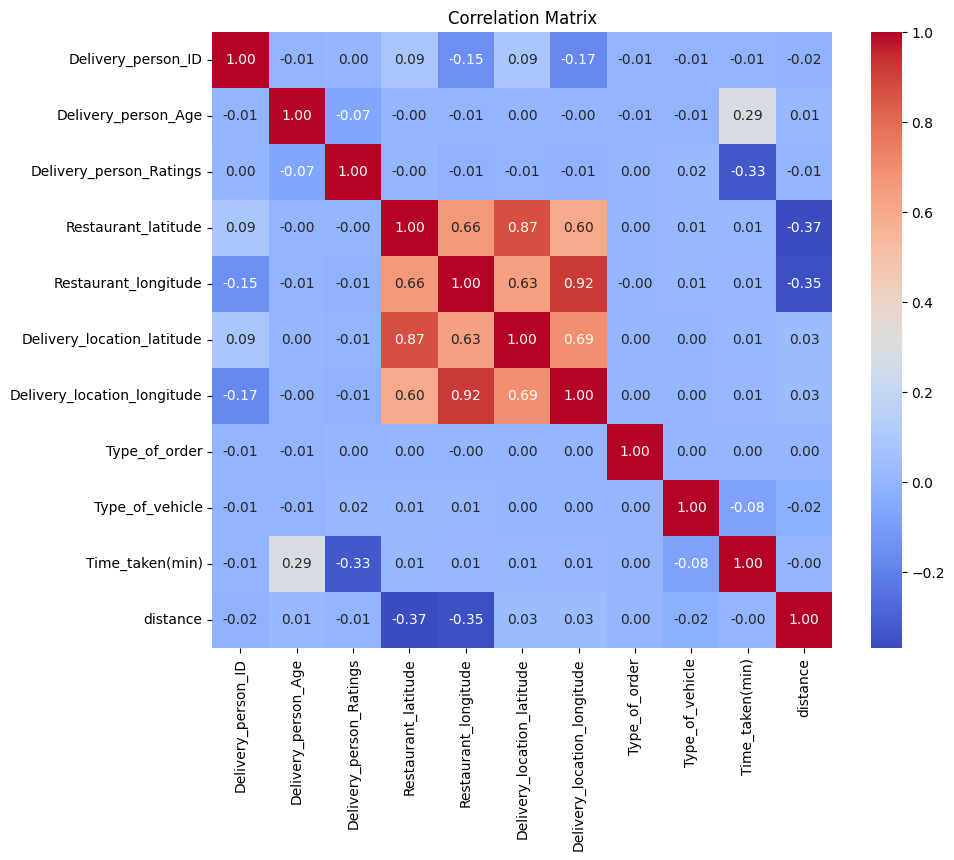

In [14]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

### This correlation matrix shows a strong dependance of AGE in time taken for delivery, also it affects the delivery person ratings negatively. Also the delivery person vehicle as a little bit of side effect in time taken for delivery. Rest all features are waste

### Correlation indeed measures the strength and direction of the linear relationship between two variables. It provides insight into how much one variable changes when another variable changes. However, correlation does not capture nonlinear relationships between variables. If the relationship between variables is nonlinear, the correlation coefficient may not accurately reflect the strength of the association.

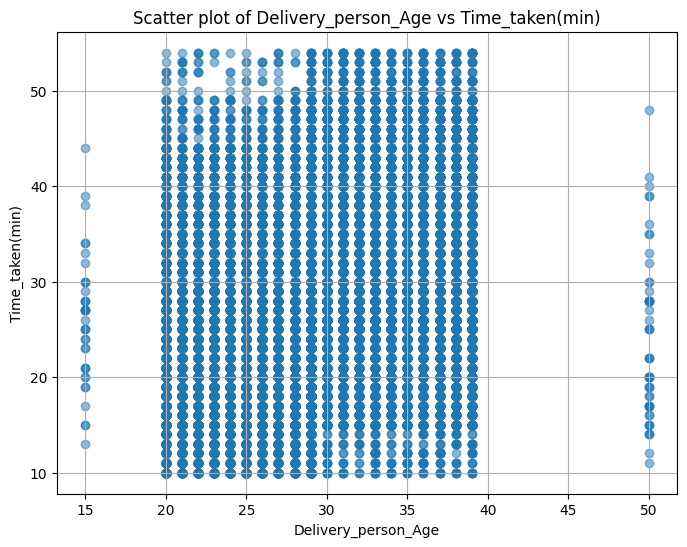

In [15]:
x = 'Delivery_person_Age' 
y = df['Time_taken(min)']  


plt.figure(figsize=(8, 6))
plt.scatter(df[x], y,alpha=0.5) 
plt.xlabel(x) 
plt.ylabel('Time_taken(min)')  
plt.title(f'Scatter plot of {x} vs Time_taken(min)')  
plt.grid(True)  
plt.show()

In [16]:
l=['Delivery_person_ID',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Type_of_order', 'Type_of_vehicle', 'Time_taken(min)']
X = df.drop(l,axis=1)
y = df['Time_taken(min)']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train=X_train.to_numpy()
X_val=X_val.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

X_train[0]

array([[37.       ],
       [ 4.8      ],
       [ 1.5148049]])

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True,input_shape= (X_train.shape[1],1))))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(25))
model.add(Dense(1))


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=5)


Epoch 1/5

1140/1140 [==============================] - 19s 9ms/step - loss: 84.3125
Epoch 2/5
1140/1140 [==============================] - 10s 8ms/step - loss: 63.8321
Epoch 3/5
1140/1140 [==============================] - 10s 8ms/step - loss: 61.6699
Epoch 4/5
1140/1140 [==============================] - 10s 8ms/step - loss: 60.0858
Epoch 5/5
1140/1140 [==============================] - 10s 9ms/step - loss: 59.1880


In [19]:
y=model.predict(X_val)


285/285 [==============================] - 3s 4ms/step


In [20]:
y

array([[28.030306],
       [29.192049],
       [38.29631 ],
       ...,
       [23.638508],
       [22.371552],
       [25.198244]], dtype=float32)

In [21]:
y_val

7725     44
949      41
44893    39
42071    38
27091    38
         ..
7388     15
6330     34
8426     21
768      17
38292    25
Name: Time_taken(min), Length: 9119, dtype: int64

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_val, y)
mse = mean_squared_error(y_val, y)
mae = mean_absolute_error(y_val, y)
rmse = np.sqrt(mse)

# Display the results
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R²: 0.3423687475097035
MSE: 57.65988287297537
MAE: 5.918274985814463
RMSE: 7.5934104902194886


In [23]:
model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1],1)))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dense(units=25,activation='relu'))
model1.add(Dense(1))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1140/1140 [==============================] - 15s 9ms/step - loss: 105.0479
Epoch 2/5
1140/1140 [==============================] - 10s 9ms/step - loss: 65.2143
Epoch 3/5
1140/1140 [==============================] - 10s 9ms/step - loss: 62.0670
Epoch 4/5
1140/1140 [==============================] - 10s 9ms/step - loss: 61.1289
Epoch 5/5
1140/1140 [==============================] - 10s 9ms/step - loss: 60.0732


In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, LeakyReLU

model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dense(units=24, activation="tanh"))
model2.add(Dropout(0.2))  # Correct usage of Dropout
model2.add(Dense(units=12))
model2.add(LeakyReLU(alpha=0.01))  # Correct usage of LeakyReLU
model2.add(Dense(1))
model2.summary()
model2.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model2.fit(X_train, y_train, batch_size=32, epochs=50)

# Make predictions
y_pred = model2.predict(X_val)

# Compute regression metrics
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Display the results
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 12)                300       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [27]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,637,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,24,3.025149
1,232,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,33,20.183530
2,234,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,26,1.552758
3,397,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,21,7.790401
4,333,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...
45588,672,30,4.8,26.902328,75.794257,26.912328,75.804257,2,2,32,1.489846
45589,45,21,4.6,0.000000,0.000000,0.070000,0.070000,0,2,36,11.007735
45590,326,30,4.9,13.022394,80.242439,13.052394,80.272439,1,3,16,4.657195
45591,390,20,4.7,11.001753,76.986241,11.041753,77.026241,3,2,26,6.232393


In [28]:
len(df.columns)

11

In [29]:
X,y = df.drop(["Time_taken(min)"],axis=1),df["Time_taken(min)"]

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
k=5
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

In [32]:
selected_features = X.columns[selector.get_support()]


In [33]:
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Delivery_person_Age
Delivery_person_Ratings
Restaurant_latitude
Delivery_location_latitude
Type_of_vehicle


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=False)

In [35]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
y_pred = model.predict(X_test)


In [37]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the results
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R²: 0.2509153696009513
MSE: 66.8897802221554
MAE: 6.396346651398443
RMSE: 8.178617256123152


In [38]:
import xgboost as xgb

# Training XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Computing regression metrics for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Display the results for XGBoost
print("XGBoost Results")
print(f"R²: {r2_xgb}")
print(f"MSE: {mse_xgb}")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")


XGBoost Results
R²: 0.34170390817304297
MSE: 58.78278517068464
MAE: 5.996978985242303
RMSE: 7.666993228814321


In [39]:
import lightgbm as lgb

# Training LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lgb_model.fit(X_train, y_train)

# Making predictions with LightGBM
y_pred_lgb = lgb_model.predict(X_test)

# Computing regression metrics for LightGBM
r2_lgb = r2_score(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

# Display the results for LightGBM
print("LightGBM Results")
print(f"R²: {r2_lgb}")
print(f"MSE: {mse_lgb}")
print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 36474, number of used features: 5
[LightGBM] [Info] Start training from score 26.315403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl